In [33]:
import pandas as pd

file_path = r"C:\Users\Win 10\Downloads\synthetic_data_groups.csv"  # Adjust the path as needed

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(data.head())
except PermissionError:
    print("Permission Denied: Check if the file is open or if you have the correct permissions.")
except FileNotFoundError:
    print("File Not Found: Double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

File loaded successfully!
         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  27-10-2018  82355     1128         37                0.87        1172.03   
1  30-10-2016  94106     2737         55                1.12         932.14   
2  15-01-2015   4148       72         40                0.37        8385.15   
3  19-03-2017  86999     3202         41                0.87        1067.08   
4  19-03-2020  50730     4180         39                0.91         679.94   

     Ad_group         Region Device_type     CTR  
0  ad_group_3  North America      Mobile  0.0137  
1  ad_group_4         Europe      Mobile  0.0291  
2   AdGroup_1           East      Tablet  0.1531  
3  ad_group_3  South America     Desktop  0.0368  
4  ad_group_2  North America      Mobile  0.0824  


In [34]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path = r"C:\Users\Win 10\Downloads\synthetic_data_groups.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(data.head())

# Display basic information about the DataFrame
print(data.info())

# Optional: Check for missing values in the dataset
print(data.isnull().sum())

# Optional: Display basic statistics for numerical columns
print(data.describe())

         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  27-10-2018  82355     1128         37                0.87        1172.03   
1  30-10-2016  94106     2737         55                1.12         932.14   
2  15-01-2015   4148       72         40                0.37        8385.15   
3  19-03-2017  86999     3202         41                0.87        1067.08   
4  19-03-2020  50730     4180         39                0.91         679.94   

     Ad_group         Region Device_type     CTR  
0  ad_group_3  North America      Mobile  0.0137  
1  ad_group_4         Europe      Mobile  0.0291  
2   AdGroup_1           East      Tablet  0.1531  
3  ad_group_3  South America     Desktop  0.0368  
4  ad_group_2  North America      Mobile  0.0824  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date     

In [28]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [36]:
# Load dataset
data = pd.read_csv(r"C:\Users\Win 10\Downloads\synthetic_data_groups.csv")

# Inspect data
print(data.head())
print(data.info())
print(data.describe())

         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  27-10-2018  82355     1128         37                0.87        1172.03   
1  30-10-2016  94106     2737         55                1.12         932.14   
2  15-01-2015   4148       72         40                0.37        8385.15   
3  19-03-2017  86999     3202         41                0.87        1067.08   
4  19-03-2020  50730     4180         39                0.91         679.94   

     Ad_group         Region Device_type     CTR  
0  ad_group_3  North America      Mobile  0.0137  
1  ad_group_4         Europe      Mobile  0.0291  
2   AdGroup_1           East      Tablet  0.1531  
3  ad_group_3  South America     Desktop  0.0368  
4  ad_group_2  North America      Mobile  0.0824  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date     

In [37]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (impute or drop)
data = data.dropna()

# Check for duplicates
print(data.duplicated().sum())

# Fix for DD-MM-YYYY format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Convert Ad_group to category (your dataset does not have 'ad')
data['Ad_group'] = data['Ad_group'].astype('category')


Date                  0
Shown                 0
Clicked               0
Converted             0
Avg_cost_per_click    0
Total_revenue         0
Ad_group              0
Region                0
Device_type           0
CTR                   0
dtype: int64
0


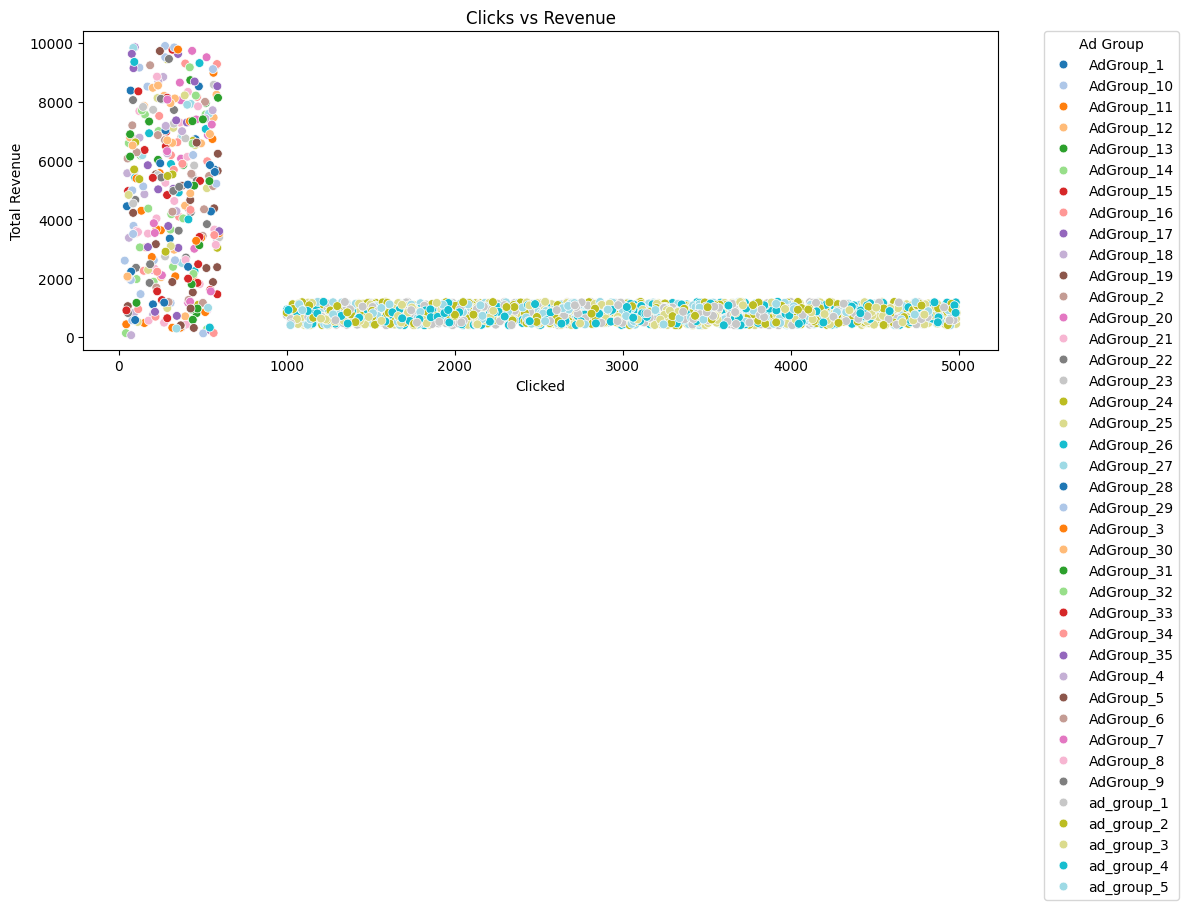

In [39]:
plt.figure(figsize=(12,7))

sns.scatterplot(
    x='Clicked',
    y='Total_revenue',
    data=data,
    hue='Ad_group',
    palette='tab20',  # for better colors
    s=40              # reduce point size for clarity
)

plt.title('Clicks vs Revenue')
plt.xlabel('Clicked')
plt.ylabel('Total Revenue')

# Move legend outside the plot
plt.legend(
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0.,
    title='Ad Group'
)

plt.tight_layout()  # adjust layout to fit legend
plt.show()


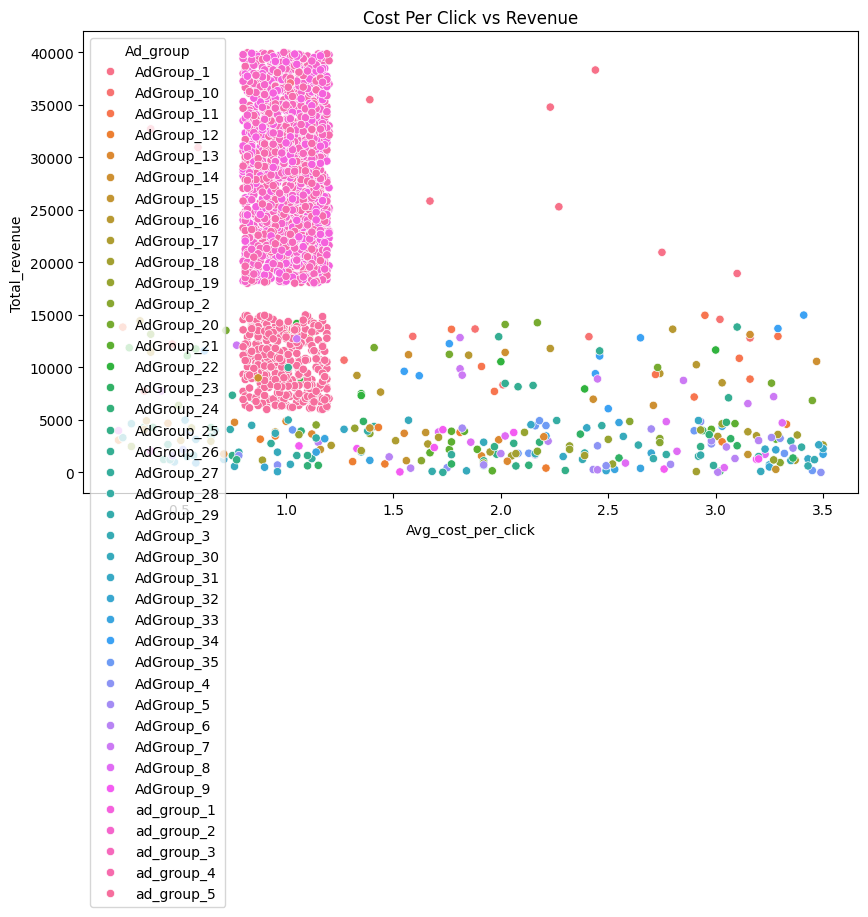

In [43]:
# Visualize the relationship between avg_cost_per_click and total_revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg_cost_per_click', y='Total_revenue', data=data, hue='Ad_group')
plt.title('Cost Per Click vs Revenue')
plt.show()

In [44]:
print(data['Ad_group'].unique())
print("Total Ad Groups:", data['Ad_group'].nunique())


['ad_group_3', 'ad_group_4', 'AdGroup_1', 'ad_group_2', 'ad_group_1', ..., 'AdGroup_3', 'AdGroup_2', 'AdGroup_4', 'AdGroup_12', 'AdGroup_31']
Length: 40
Categories (40, object): ['AdGroup_1', 'AdGroup_10', 'AdGroup_11', 'AdGroup_12', ..., 'ad_group_2', 'ad_group_3', 'ad_group_4', 'ad_group_5']
Total Ad Groups: 40


In [45]:
print(data['Ad_group'].value_counts())


Ad_group
ad_group_3    432
ad_group_2    404
ad_group_1    404
ad_group_4    397
ad_group_5    363
AdGroup_35     10
AdGroup_3      10
AdGroup_30     10
AdGroup_31     10
AdGroup_32     10
AdGroup_33     10
AdGroup_34     10
AdGroup_5      10
AdGroup_4      10
AdGroup_10     10
AdGroup_6      10
AdGroup_7      10
AdGroup_8      10
AdGroup_9      10
AdGroup_29     10
AdGroup_1      10
AdGroup_27     10
AdGroup_18     10
AdGroup_11     10
AdGroup_12     10
AdGroup_13     10
AdGroup_14     10
AdGroup_15     10
AdGroup_16     10
AdGroup_17     10
AdGroup_19     10
AdGroup_26     10
AdGroup_2      10
AdGroup_20     10
AdGroup_21     10
AdGroup_22     10
AdGroup_23     10
AdGroup_24     10
AdGroup_25     10
AdGroup_28     10
Name: count, dtype: int64


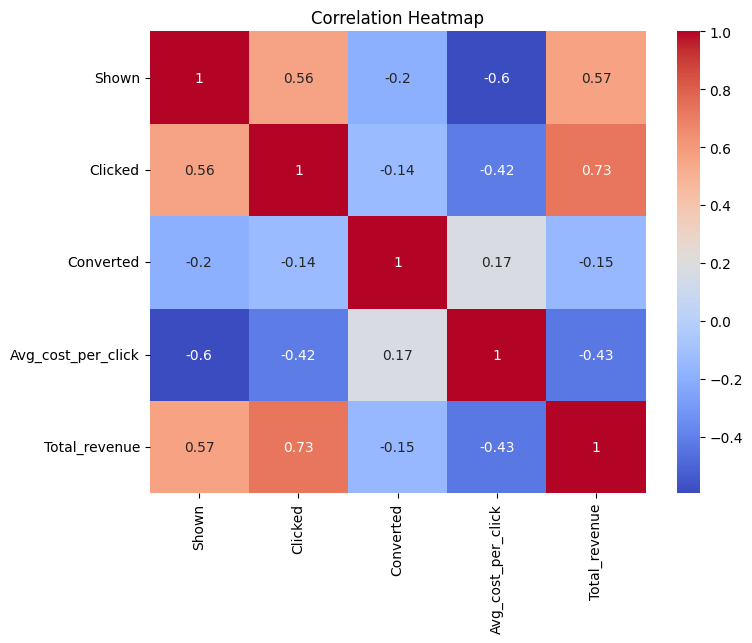

In [46]:
# Correlation heatmap to explore relationships between numeric variables
correlation_matrix = data[['Shown', 'Clicked', 'Converted', 'Avg_cost_per_click', 'Total_revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [47]:
# Create a new feature for conversion rate
data['Conversion_rate'] = data['Converted'] / data['Clicked']

# Feature for Return on Ad Spend (ROAS)
data['Roas'] = data['Total_revenue'] / (data['Clicked'] * data['Avg_cost_per_click'])

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'ad_spend_data.csv' with your file name)
data = pd.read_csv(r"C:\Users\Win 10\Downloads\synthetic_data_groups.csv")

# Step 1: Check for NaN values
print("Checking for NaN values in the dataset...")
print(data.isnull().sum())

# Step 2: Handle Missing Values

# Numerical columns: Fill with the mean
numerical_cols = ['Shown', 'Clicked', 'Converted', 'Avg_cost_per_click', 'Total_revenue']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

# Categorical columns: Fill with the mode (if you have any)
categorical_cols = ['Ad_group']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Step 3: Verify that NaN values are handled
print("After handling NaN values:")
print(data.isnull().sum())

# Step 4: Feature Engineering (if required)
# Create additional features, such as conversion rate
data['Conversion_rate'] = data['Converted'] / data['Clicked']
data['Conversion_rate'] = data['Conversion_rate'].fillna(0)  # Fill any new NaN values with 0

# Step 5: Prepare Features (X) and Target (y)
# Assuming 'total_revenue' is the target variable
X = data[['Shown', 'Clicked', 'Converted', 'Avg_cost_per_click', 'Conversion_rate']]
y = data['Total_revenue']
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data is now preprocessed and ready for training!
print("Preprocessing complete. Data is ready for training.")

Checking for NaN values in the dataset...
Date                  0
Shown                 0
Clicked               0
Converted             0
Avg_cost_per_click    0
Total_revenue         0
Ad_group              0
Region                0
Device_type           0
CTR                   0
dtype: int64
After handling NaN values:
Date                  0
Shown                 0
Clicked               0
Converted             0
Avg_cost_per_click    0
Total_revenue         0
Ad_group              0
Region                0
Device_type           0
CTR                   0
dtype: int64
Preprocessing complete. Data is ready for training.


In [49]:
#LINEAR REGRESSION

In [51]:
# Define features and target variable
X = data[['Shown', 'Clicked', 'Avg_cost_per_click', 'Conversion_rate']]
y = data['Total_revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 1402644.6445534106
R-squared: 0.5360879546053758
                    Coefficient
Shown               -886.080058
Clicked             -281.372003
Avg_cost_per_click   259.290269
Conversion_rate      137.036406


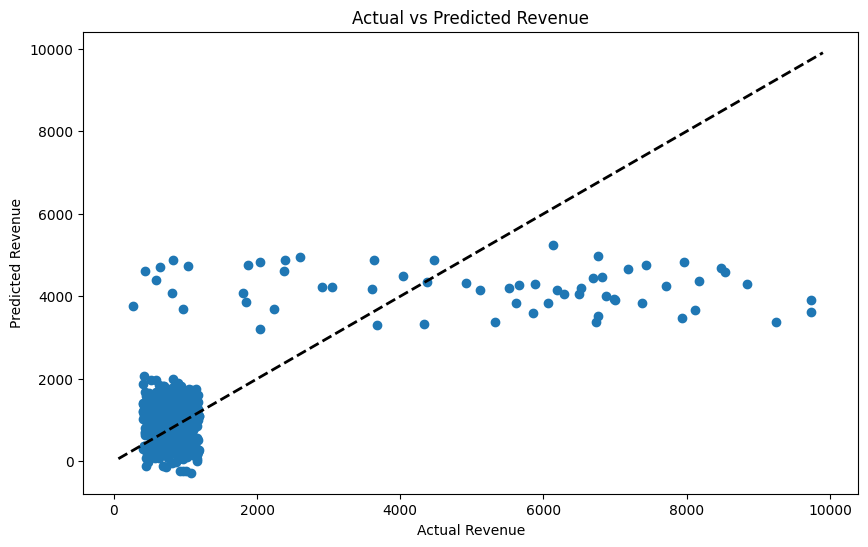

In [55]:
# Compare actual vs predicted revenue
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()

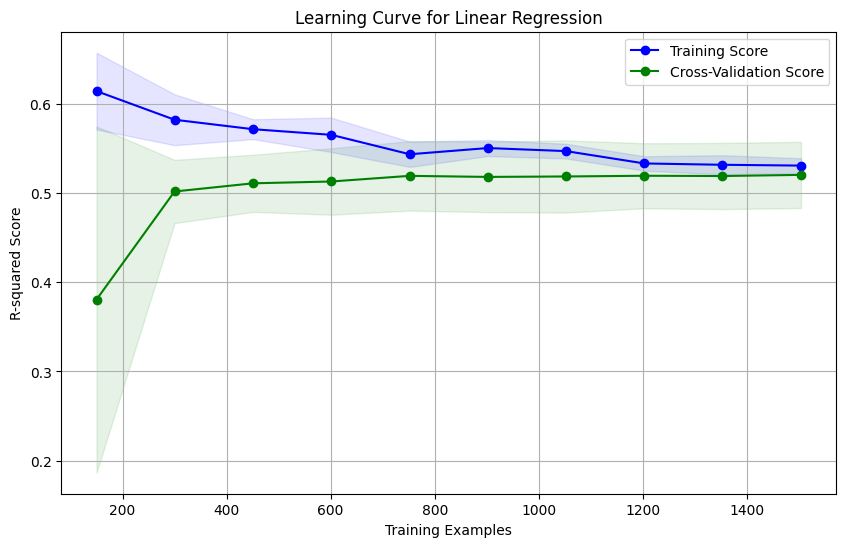

In [56]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model,  # The trained linear regression model
    X_train_scaled,  # Scaled training features
    y_train,  # Training target
    cv=5,  # Number of cross-validation splits
    scoring='r2',  # Use R-squared for evaluation
    n_jobs=-1,  # Use all processors
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training set fractions
)

# Calculate mean and standard deviation for train/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='blue',
)
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color='green',
)

# Add titles and labels
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [57]:
from sklearn.metrics import mean_squared_error

# Baseline model: Predict the mean of the target values
baseline_prediction = np.mean(y_train)  # Using mean as the baseline
y_baseline = np.full_like(y_test, baseline_prediction)  # Same prediction for all test samples

# Predicted values from your trained model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error for baseline and model
baseline_mse = mean_squared_error(y_test, y_baseline)
model_mse = mean_squared_error(y_test, y_pred)

# Percentage improvement
improvement_percent = ((baseline_mse - model_mse) / baseline_mse) * 100

# Display results
print(f"Baseline MSE: {baseline_mse:.2f}")
print(f"Model MSE: {model_mse:.2f}")
print(f"Percentage Improvement: {improvement_percent:.2f}%")

Baseline MSE: 3025856.37
Model MSE: 1402644.64
Percentage Improvement: 53.64%


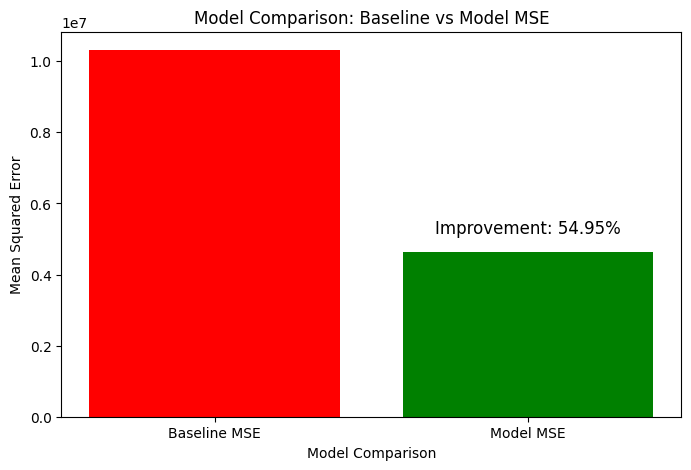

In [58]:
import matplotlib.pyplot as plt

# Define baseline MSE and model MSE
baseline_mse = 10315971.89
model_mse = 4647684.80

# Calculate the percentage improvement in MSE
percentage_improvement = ((baseline_mse - model_mse) / baseline_mse) * 100

# Plot the comparison of MSE values
mse_values = [baseline_mse, model_mse]
labels = ['Baseline MSE', 'Model MSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color=['red', 'green'])

# Adding percentage improvement as text annotation on the bar plot
plt.text(1, model_mse + 500000, f'Improvement: {percentage_improvement:.2f}%', ha='center', fontsize=12)

plt.xlabel('Model Comparison')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison: Baseline vs Model MSE')

# Display the plot
plt.show()


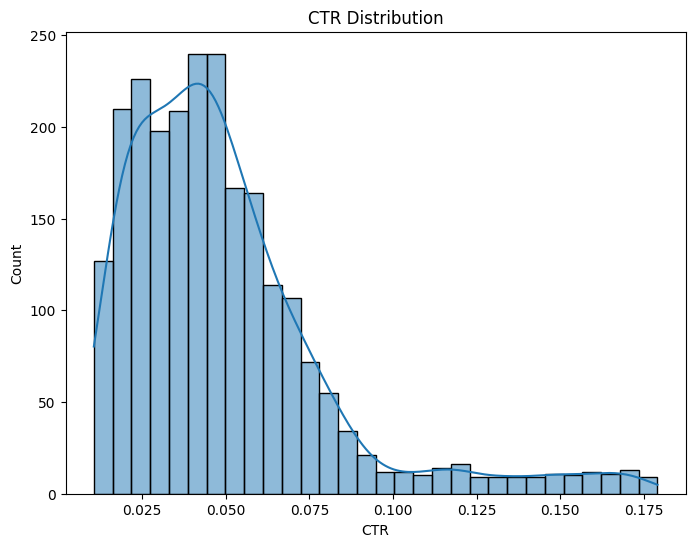

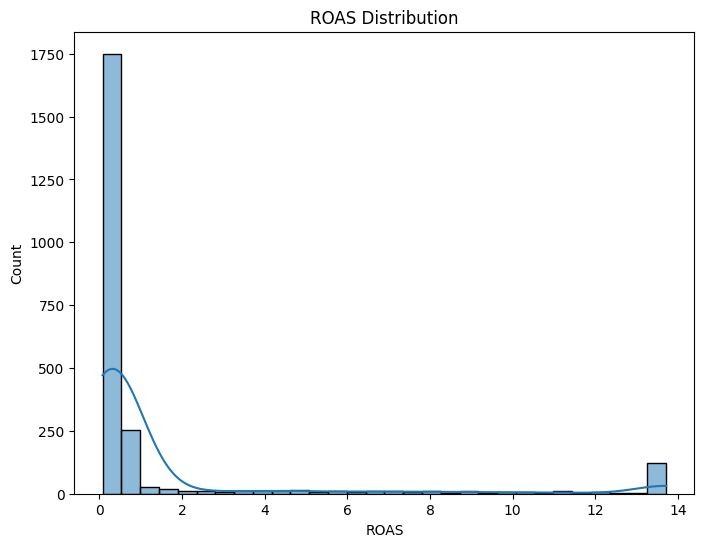

In [64]:
# Compute ROAS
data["Cost"] = data["Clicked"] * data["Avg_cost_per_click"]
data["ROAS"] = data["Total_revenue"] / data["Cost"]

# Replace bad values safely (no warnings)
data["ROAS"] = data["ROAS"].replace([np.inf, -np.inf], np.nan).fillna(0)

# Optional: make ROAS look realistic (avoid ugly huge spikes)
# Clip at 95th percentile
upper_limit = data["ROAS"].quantile(0.95)
data["ROAS"] = data["ROAS"].clip(0, upper_limit)

# --- Plot CTR ---
plt.figure(figsize=(8, 6))
sns.histplot(data['CTR'], kde=True, bins=30)
plt.title('CTR Distribution')
plt.show()

# --- Plot ROAS ---
plt.figure(figsize=(8, 6))
sns.histplot(data['ROAS'], kde=True, bins=30)
plt.title('ROAS Distribution')
plt.show()


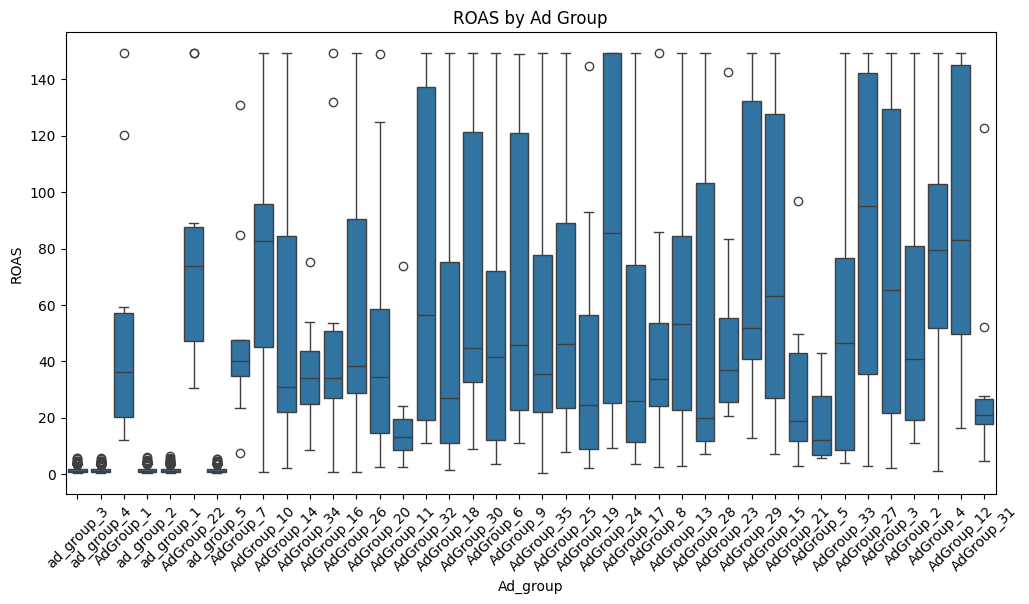

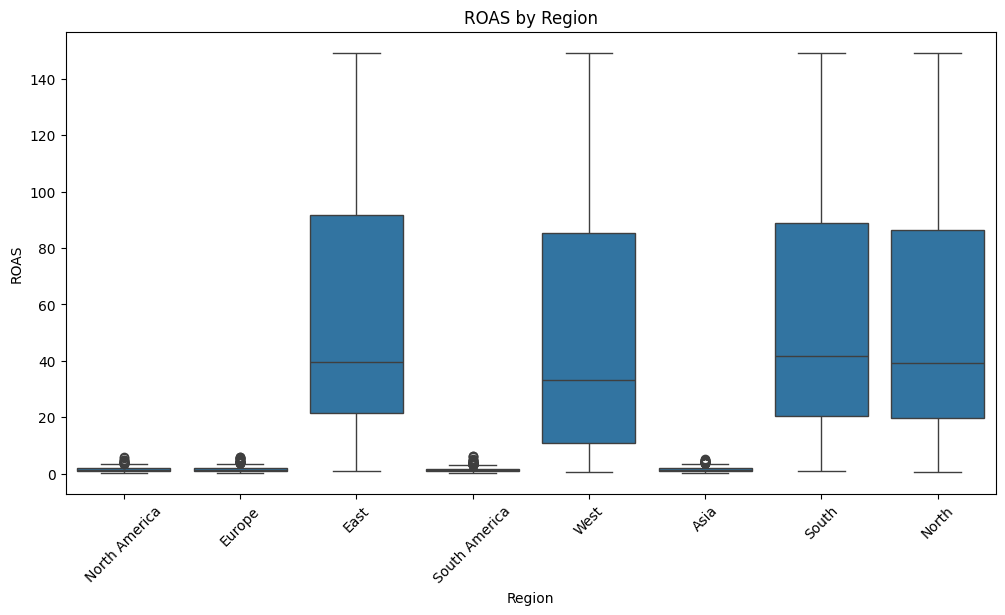

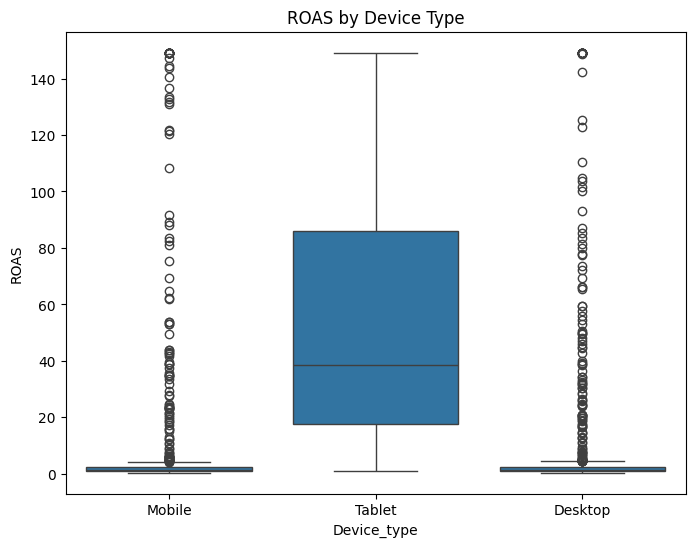

In [66]:
# Ad group performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ad_group', y='ROAS', data=data)
plt.title('ROAS by Ad Group')
plt.xticks(rotation=45)
plt.show()

# Regional performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='ROAS', data=data)
plt.title('ROAS by Region')
plt.xticks(rotation=45)
plt.show()

# Device type performance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Device_type', y='ROAS', data=data)
plt.title('ROAS by Device Type')
plt.show()
